# Prepare the dataset

This notebook is meant to be executed for preparing the Cats vs. Dogs dataset. We are moving images of each class into a directory with the same name of their class.

In [3]:
import os
import glob
import shutil

In [4]:
data_path = os.path.join('data', 'cats_vs_dogs')
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')

In [5]:
class_names = ('cat', 'dog')

Train-test-split ratio is 80:20. Since we have 12,500 images for each class. The last 2,500 images of each are moved to the corresponding test directory.


So, the structure of our directories is as follows:
```
data
|
|-- cats_vs_dogs
    |
    |-- cat
    |   |
    |   |-- train
    |   |   |
    |   |   |-- cat.0.jpg
    |   |   |-- ...
    |   |   |-- cat.9999.jpg
    |   |
    |   |-- test
    |       |
    |       |-- cat.10000.jpg
    |       |-- ...
    |       |-- cat.12499.jpg
    |
    |-- dog
    |   |
    |   |-- train
    |   |   |
    |   |   |-- dog.0.jpg
    |   |   |-- ...
    |   |   |-- dog.9999.jpg
    |   |
    |   |-- test
    |       |
    |       |-- dog.10000.jpg
    |       |-- ...
    |       |-- dog.12499.jpg
```

Having the structure like this can allow us to use the `ImageFolder` class of PyTorch to load all images with ease.

In [15]:
for subset in ('train', 'test'):
    for class_name in class_names:
        subset_class_path = os.path.join(data_path, subset, class_name)
        if not os.path.exists(subset_class_path):
            os.makedirs(subset_class_path)

In [16]:
for class_name in class_names:
    for file in glob.glob(train_path + '/' + class_name + '*.jpg'):
        filename = os.path.basename(file)
        num = int(filename.split('.')[1])
        subset_name = 'train'
        if num >= 10000:
            subset_name = 'test'
        subset_class_path = os.path.join(data_path, subset_name, class_name)
        shutil.move(file, subset_class_path)

## Image Resolution

Here, resolutions all images are examined, so that we can know more about the dataset.

In [28]:
from PIL import Image

extreme_resolutions = []
extreme_files = []
for subset_name in ('train', 'test'):
    resolutions = []
    filenames = []
    for class_name in class_names:
        subset_class_path = os.path.join(data_path, subset_name, class_name)
        for file in glob.glob(subset_class_path + '/*.jpg'):
            img = Image.open(file)
            width, height = img.size
            resolutions.append((width, height))
            filenames.append(file)
    min_resolution = min(resolutions, key=lambda x: x[0] * x[1])
    max_resolution = max(resolutions, key=lambda x: x[0] * x[1])
    extreme_resolutions.append(min_resolution)
    extreme_resolutions.append(max_resolution)
    extreme_files.append(filenames[resolutions.index(min_resolution)])
    extreme_files.append(filenames[resolutions.index(max_resolution)])
    print(f"[{subset_name}] min = {min_resolution}")
    print(f"[{subset_name}] max = {max_resolution}")

[train] min = (60, 32)
[train] max = (1023, 768)
[test] min = (50, 38)
[test] max = (499, 500)


These are four images that have minimum or maximum resolution, two from the training set and two from the test set.

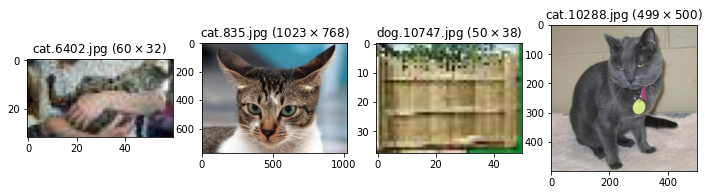

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, figsize=(12, 6))

for i, file in enumerate(extreme_files):
    img = Image.open(file)
    width, height = img.size
    axs[i].imshow(img)
    
    filename = os.path.basename(file)
    axs[i].set_title(f"{filename} $({width} \\times {height})$")